In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [82]:
plt.rcParams['figure.figsize'] = [15, 5]

def plotpretify(ax, maxx, minx=0, miny=None, maxy=None, 
                Grid=True, LB=True, LL=True):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=LB,
        left=False,
        right=False,
        labelleft=LL)
    ax.grid(Grid)
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

7.386368960929813
0.9614925423066943


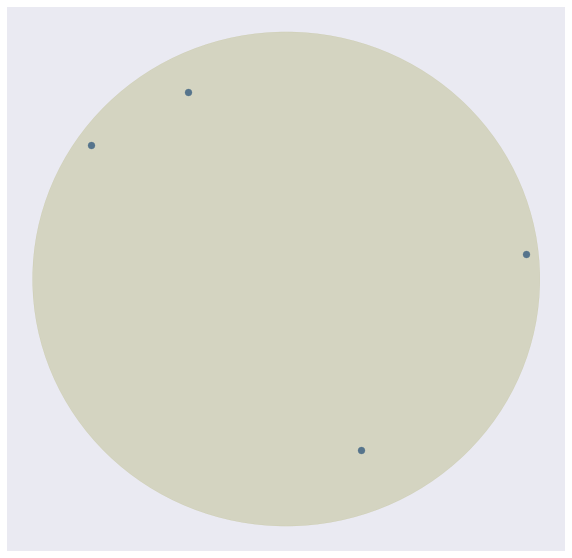

In [172]:
def incircle(x, y, r=1, mx=0, my=0):
    return np.power(x - mx, 2) + np.power(y - my, 2) < r


def spawn(r=1):
    x = random.uniform(-1, 1)
    limits = [-np.sqrt(1 - x**2), np.sqrt(1 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(len(coord)):
            if i != j:
                totalDist += checkEnergy(coord, i, j)
    return totalDist


def listSort(coord):
    data = {}
    for i in range(len(coord)):
        for j in range(len(coord)):
            if i != j:
                data[abs(checkEnergy(coord, i, j))] = (i, j)
    return data


def changeCoordListSort(coord, data):
    if random.random() < 0.5:
        coord[data[0]] = spawn()
    else:
        coord[data[1]] = spawn()
    return coord


def checkEnergy(coord, i, j):
    return math.hypot(coord[j][0] - coord[i][0], coord[j][1] - coord[i][1])
# 1 / (np.linalg.norm(coord[i]) - np.linalg.norm(coord[j]))


def checkForce(coord, i, j):
    return (np.linalg.norm(coord[i]) - np.linalg.norm(coord[j])) / (
            abs(np.linalg.norm(coord[i]) - np.linalg.norm(coord[j]))**3)


def changeCoord(coord):
    i = random.randint(0, len(coord) - 1)
    coord[i] = spawn()
    return coord


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return answer


def simAn(iterations, numPoints, schemePlot):
    coordList = []
    for i in range(numPoints):
        coordList.append(spawn())
    coordList = np.array(coordList)
    score = checkScore(coordList)
    print(score)
    scheme = getScheme_data(iterations, plot=schemePlot)
    data = listSort(coordList)

    for i in range(iterations):
        tmpList = changeCoordListSort(coordList,
                                      data.pop(min(data.keys()), None))
        tmpScore = checkScore(tmpList)
        if score > tmpScore:
            coordList = tmpList
            score = tmpScore
#         elif scheme[i] > np.random.uniform():
#             coordList = tmpList
#             score = tmpScore

        if i % 5 == 0:
            data = listSort(coordList)
    return score, coordList


score, coordList = simAn(300000, 4, schemePlot="No")
print(score)

plt.rcParams['figure.figsize'] = [10, 10]
sns.set()
sns.set_style("dark")
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(coordList[:, 0], coordList[:, 1])
circle1 = plt.Circle((0, 0), 1, alpha=0.2, color="olive")
ax.add_artist(circle1)
plotpretify(
    ax, 1.1, minx=-1.1, miny=-1.1, maxy=1.1, Grid=False, LL=False, LB=False)

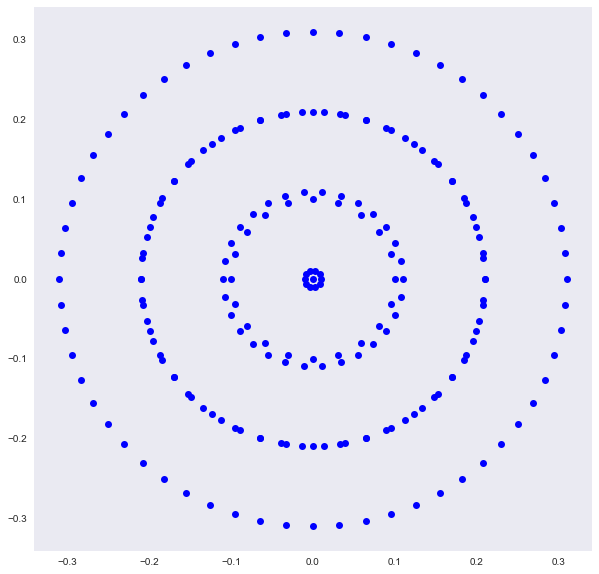

In [177]:
import numpy as np
import matplotlib.pyplot as plt

T = [1, 10, 20, 30, 40, 50, 60]
R = [0.0, 0.01, 0.1, 0.11, 0.21, 0.21, 0.31]



def rtpairs(r, n):

    for i in range(len(r)):
       for j in range(n[i]):    
        yield r[i], j*(2 * np.pi / n[i])

for r, t in rtpairs(R, T):
    plt.plot(r * np.cos(t), r * np.sin(t), 'bo')
plt.show()